<a href="https://colab.research.google.com/github/sambleu13/ecobici-stats/blob/main/ecobici_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


import datetime as dt

In [ ]:
print(pd.__version__)

sns.set_style("whitegrid")
sns.set_context("notebook")


2.2.2


In [ ]:

path = "/content/drive/MyDrive/ETL/2025-01.csv"
dtype_dict = {'Genero_Usuario': 'string', 'Edad_Usuario': 'Int64', 'Bici': 'Int64',
              'Ciclo_Estacion_Retiro': 'string', 'Fecha_Retiro': 'string', 'Hora_Retiro': 'string',
              'Ciclo_EstacionArribo': 'string', 'Fecha_Arribo': 'string', 'Hora_Arribo': 'string'}
df = pd.read_csv(path, dtype=dtype_dict)

In [ ]:
dfs = [pd.read_csv(f, index_col=[0], parse_dates=[0])
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=1, join='inner').sort_index()


In [ ]:

print(df.info())
print(df.describe())
print(df.head())
print(df[:31])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809775 entries, 0 to 1809774
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Genero_Usuario         string
 1   Edad_Usuario           Int64 
 2   Bici                   Int64 
 3   Ciclo_Estacion_Retiro  string
 4   Fecha_Retiro           string
 5   Hora_Retiro            string
 6   Ciclo_EstacionArribo   string
 7   Fecha_Arribo           string
 8   Hora_Arribo            string
dtypes: Int64(2), string(7)
memory usage: 127.7 MB
None
       Edad_Usuario            Bici
count     1809628.0       1809775.0
mean      34.003515  5456874.596215
std        9.798162   2021559.56953
min            16.0       2000461.0
25%            27.0       3726999.0
50%            32.0       5452651.0
75%            39.0       7213432.0
max           124.0       8999708.0
  Genero_Usuario  Edad_Usuario     Bici Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            26  5180930      

In [ ]:
#convert strings to date DD/MM/YYYY and time HH:MM:SS

df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format='%d/%m/%Y')
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], format='%d/%m/%Y')
df['Hora_Retiro'] = pd.to_datetime(df['Hora_Retiro'], format='%H:%M:%S')
df['Hora_Arribo'] = pd.to_datetime(df['Hora_Arribo'], format='%H:%M:%S')


In [ ]:
print(df.info())
print(df.head())

nrow, ncol = df.shape
print(f'Number of rows: {nrow}')
print(f'Number of columns: {ncol}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809775 entries, 0 to 1809774
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         string        
 1   Edad_Usuario           Int64         
 2   Bici                   Int64         
 3   Ciclo_Estacion_Retiro  string        
 4   Fecha_Retiro           datetime64[ns]
 5   Hora_Retiro            datetime64[ns]
 6   Ciclo_EstacionArribo   string        
 7   Fecha_Arribo           datetime64[ns]
 8   Hora_Arribo            datetime64[ns]
dtypes: Int64(2), datetime64[ns](4), string(3)
memory usage: 127.7 MB
None
  Genero_Usuario  Edad_Usuario     Bici Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            26  5180930                   568   2024-12-31   
1              F            54  3653953                   283   2024-12-31   
2              M            38  7511322                   034   2024-12-31   
3              M            

In [ ]:
df_clean = df.dropna()
nrow, ncol = df_clean.shape
print(f'Number of rows: {nrow}')
print(f'Number of columns: {ncol}')

Number of rows: 1809628
Number of columns: 9


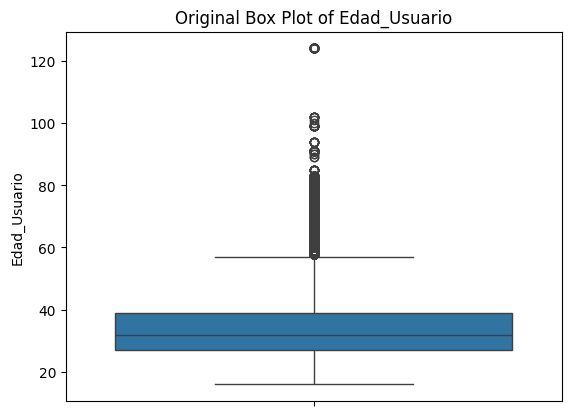

124 16
6
Mean:  34.00351508707867

Standard deviation:  9.79815926169088

Outliers  :  [np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(94), np.int64(124), np.int64(99), np.int64(94), np.int64(94), np.int64(99), np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(124), np.int64(102), np.int64(124), np.int64(124), np.int64(99), np.int64(124), np.int64(99), np.int64(124), np.int64(99), np.int64(99), np.int64(124), np.int64(124), np.int64(124), np.int64(102), np.int64(99), np.int64(94), np.int64(99), np.int64(99), np.int64(94), np.int64(124), np.int64(124), np.int64(124), np.int64(101), np.int64(124), np.int64(99), np.int64(99), np.int64(124), np.int64(124), np.int64(99), np.int64(124), np.int64(99), np.int64(124), np.int64(99), np.int64(99), np.int64(102), np.int64(102), np.int64(102), np.int64(99), np.int64(100), np.int64(102), np.int64(124), np.int64(102), np.int64(99), np.int64(94), np.int64(94), np.int

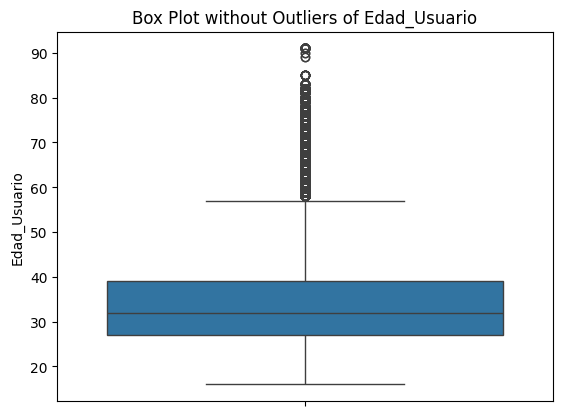

91 16


,Edad_Usuario,Bici,Fecha_Retiro,Hora_Retiro,Fecha_Arribo,Hora_Arribo
count,1809547.0,1809547.0,1809547,1809547,1809547,1809547
mean,34.000007,5456894.23237,2025-01-17 06:00:15.195404800,1900-01-01 14:39:01.847261952,2025-01-17 06:04:16.841739776,1900-01-01 14:50:56.288058624
min,16.0,2000461.0,2023-02-04 00:00:00,1900-01-01 00:00:00,2025-01-01 00:00:00,1900-01-01 00:00:00
25%,27.0,3726999.0,2025-01-10 00:00:00,1900-01-01 10:47:35,2025-01-10 00:00:00,1900-01-01 10:59:47
50%,32.0,5452651.0,2025-01-17 00:00:00,1900-01-01 15:06:11,2025-01-17 00:00:00,1900-01-01 15:18:43
75%,39.0,7213432.0,2025-01-24 00:00:00,1900-01-01 18:17:54,2025-01-24 00:00:00,1900-01-01 18:33:41
max,91.0,8999708.0,2025-01-31 00:00:00,1900-01-01 23:59:59,2025-01-31 00:00:00,1900-01-01 23:59:59
std,9.783964,2021544.59503,NaN,NaN,NaN,NaN


In [ ]:
#Outliers

#boxplots with names and thresholds values per column
def remove_outliers(column_name,threshold,df):
    sns.boxplot(df[column_name])
    plt.title(f'Original Box Plot of {column_name}')
    plt.show()
    print(df[column_name].max(), df[column_name].min())
    mean = np.mean(df[column_name])
    std = np.std(df[column_name])

    outliers = []
    for x in df[column_name]:
      z_score = (x - mean) / std
      if abs(z_score) > threshold:
        outliers.append(x)

    outliers = []
    for x in df[column_name]:
      z_score = (x - mean) / std
      if abs(z_score) > threshold:
        outliers.append(x)

    filtered_df = df[~df[column_name].isin(outliers)]
    print(threshold)
    print("Mean: ", mean)
    print("\nStandard deviation: ", std)
    print("\nOutliers  : ", outliers)
    #print("\nFiltered Data:\n", filtered_df)
    #print(filtered_df.describe())

    sns.boxplot(filtered_df[column_name])
    plt.title(f'Box Plot without Outliers of {column_name}')
    plt.show()
    print( filtered_df[column_name].max(), filtered_df[column_name].min())
    return filtered_df

df_no_outliers = remove_outliers('Edad_Usuario', 6, df_clean)
#threshold 7 or 5

df_no_outliers.describe()

In [ ]:
# Dataset for categorical variables

ds_cat = df_no_outliers.select_dtypes(include = 'string').copy()
ds_cat.head(2)

#Unique categories
print(ds_cat['Genero_Usuario'].unique())
#Len unique categories
print(len(ds_cat['Genero_Usuario'].unique()))
#Unique values without nulls
print(ds_cat['Genero_Usuario'].nunique())
#Count values per unique categories
print(ds_cat['Genero_Usuario'].value_counts())
#count nulls
print(ds_cat['Genero_Usuario'].isnull().sum())
#count null percentage
print((ds_cat['Genero_Usuario'].isnull().sum()/nrow)*100)
#drop nulls
ds_cat_clean = ds_cat.dropna()
#count nulls in new Dataset, it's suppose to be zero
print(ds_cat_clean['Genero_Usuario'].isnull().sum())
#verify Dataset reduce its size
print(len(ds_cat), len(ds_cat_clean))


<StringArray>
['M', 'F', 'O', '?']
Length: 4, dtype: string
4
4
Genero_Usuario
M    1252729
F     502202
O      34424
?      20192
Name: count, dtype: Int64
0
0.0
0
1809547 1809547


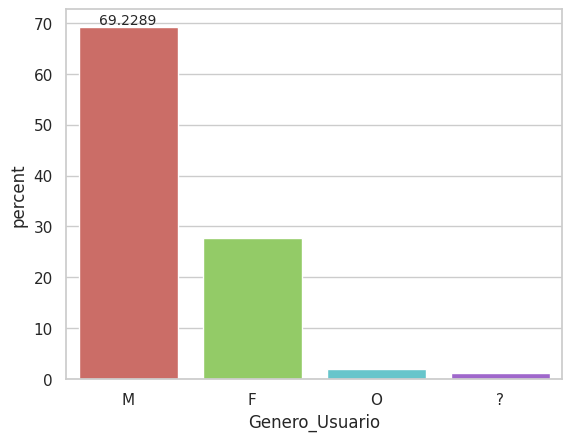

In [ ]:
percentage_plot = sns.countplot(data = ds_cat_clean, x = 'Genero_Usuario', stat='percent', palette="hls", hue='Genero_Usuario', legend=False)
percentage_plot.bar_label(percentage_plot.containers[0], fontsize=10);

In [65]:
#ver a que hora se toman mas bicis por genero

trips_per_minute = df_no_outliers.groupby([df_no_outliers['Hora_Retiro'].dt.strftime('%H:%M'), df_no_outliers['Genero_Usuario']])['Bici'].count().reset_index()
trips_per_minute.columns = ["Hora","Genero","Bicis"]
display(trips_per_minute)


,Hora,Genero,Bicis
0,00:00,?,2
1,00:00,F,40
2,00:00,M,171
3,00:00,O,5
4,00:01,?,4
...,...,...,...
4639,23:58,O,5
4640,23:59,?,2
4641,23:59,F,47
4642,23:59,M,198


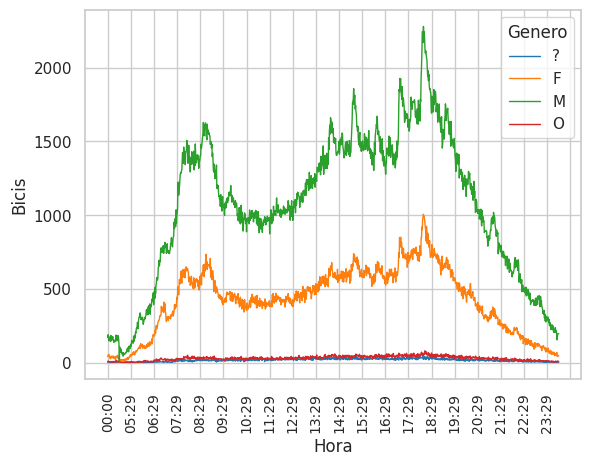

In [121]:
sns.set_style("whitegrid")
tpm_plot = sns.lineplot(data=trips_per_minute, palette="tab10", x='Hora', y='Bicis', hue='Genero', linewidth=1)
tpm_plot.tick_params(axis='x',rotation=90, labelsize=10)
tpm_plot.xaxis.set_major_locator(ticker.MultipleLocator(60))

plt.show()

In [126]:
#ver a que dia se toman mas bicis por genero

trips_per_day = df_no_outliers.groupby([df_no_outliers['Fecha_Retiro'].dt.strftime('%y/%m/%d'), df_no_outliers['Genero_Usuario']])['Bici'].count().reset_index()
trips_per_day.columns = ["Dia","Genero","Bicis"]
display(trips_per_day)

trips_per_day_2025 = trips_per_day[trips_per_day['Dia'] >= '25/01/01']
display(trips_per_day_2025)


,Dia,Genero,Bicis
0,23/02/04,M,1
1,24/08/10,F,1
2,24/11/25,M,1
3,24/12/18,F,1
4,24/12/23,M,1
...,...,...,...
130,25/01/30,O,1339
131,25/01/31,?,750
132,25/01/31,F,18466
133,25/01/31,M,47652


,Dia,Genero,Bicis
11,25/01/01,?,415
12,25/01/01,F,4585
13,25/01/01,M,11242
14,25/01/01,O,397
15,25/01/02,?,472
...,...,...,...
130,25/01/30,O,1339
131,25/01/31,?,750
132,25/01/31,F,18466
133,25/01/31,M,47652


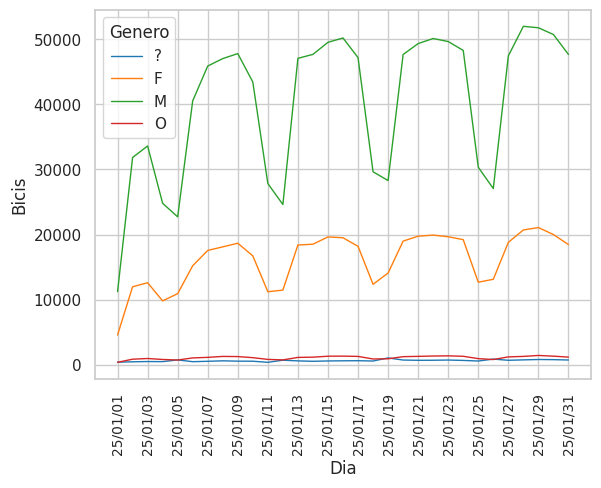

In [128]:
sns.set_style("whitegrid")
tpd_plot = sns.lineplot(data=trips_per_day_2025, palette="tab10", x='Dia', y='Bicis', hue='Genero', linewidth=1)
tpd_plot.tick_params(axis='x',rotation=90, labelsize=10)
tpd_plot.xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()